# Assignment 1: Question 4

Download the zipcode data from the data page on web.stanford.edu/ hastie/ElemStatLearn.
Implement and compare the performance of two classiers: i) a k-nearest-neighbor classier, and
ii) a Gaussian classier. (This should be easy to implement in Matlab.) Use 10% of the training
data as validation data, i.e. to determine k and any choices you make related to the covariance
structure. Describe the methods you used to make these choices, and report the performance you
obtain on the held out validation data and the test data.

In [1]:
import numpy as np


train = 'zip.train'
test = 'zip.test'

#Load training and testing data into numpy array: Consists of digit id followed by 16 x 16 pixel values
total_data = np.loadtxt(train)
testing = np.loadtxt(test)
test_data = testing[:,1:]
test_labels = testing[:,0]


total_data_size = np.shape(total_data)[0]
val_data_size = int(0.1*total_data_size)

train_data = total_data[:(total_data_size-val_data_size), 1:]
#Training labels
train_labels = total_data[:(total_data_size-val_data_size), 0]

train_data_size = np.shape(train_data)[0]
print(np.shape(train_data))
print(np.shape(train_labels))
print(train_data_size)

print(np.shape(test_data))
print(np.shape(test_labels))

(6562, 256)
(6562,)
6562
(2007, 256)
(2007,)


In [2]:
#Build validation set: 10% of training set 
val_data = total_data[(total_data_size-val_data_size):,1:]
val_labels = total_data[(total_data_size-val_data_size):, 0]
print(val_data_size)

print(np.shape(val_data))
print(np.shape(val_labels))

729
(729, 256)
(729,)


# KNN Classifier 

## Train and Validate

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt  

neighbors = []
acc = []
err = []
max_n = int(20)
#Fit classifier

for n in range (1, max_n):
    classifier = KNeighborsClassifier(n_neighbors= n)  
    classifier.fit(train_data, train_labels) 
    val_pred = classifier.predict(val_data) 
    neighbors.append(n)
    acc.append(metrics.accuracy_score(val_labels, val_pred)*100)
    err.append((1-metrics.accuracy_score(val_labels, val_pred))*100)
    print(n)
# print(confusion_matrix(val_labels, val_pred))  
# print(classification_report(val_labels, val_pred))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0,0.5,'Error (%)')

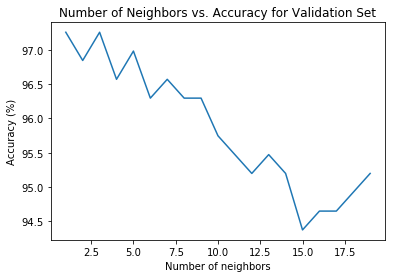

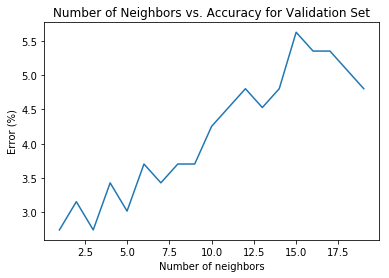

In [8]:
from sklearn.metrics import confusion_matrix

plt.figure(1)
plt.plot(neighbors, acc)
plt.title('Number of Neighbors vs. Accuracy for Validation Set')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy (%)')

plt.figure(2)
plt.plot(neighbors, err)
plt.title('Number of Neighbors vs. Accuracy for Validation Set')
plt.xlabel('Number of neighbors')
plt.ylabel('Error (%)')


## Test

Accuracy:  95.19890260631001
Error:  4.80109739368999


Text(0.5,1,'Confusion Matrix for the test set')

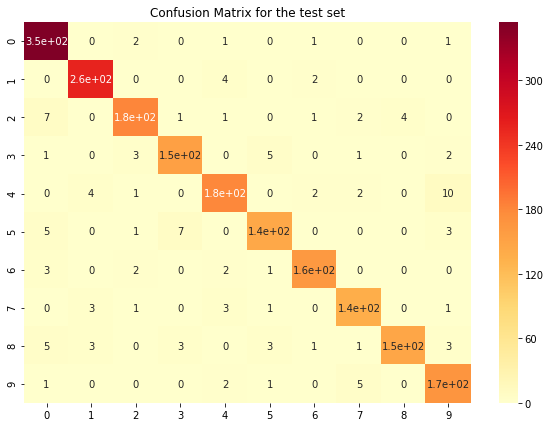

In [14]:
import seaborn as sn

classifier_final = KNeighborsClassifier(n_neighbors= 5)
classifier_final.fit(train_data, train_labels)
test_pred = classifier_final.predict(test_data)  
print("Accuracy: ", metrics.accuracy_score(val_labels, val_pred)*100)
print("Error: ", (1-metrics.accuracy_score(val_labels, val_pred))*100)

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(test_labels, test_pred), annot=True, cmap='YlOrRd')
plt.title('Confusion Matrix for the ')

# Naive Bayes Gaussian Classifier 

In this case P(X|y) is modeled as a Gaussian distribution. The assumption on the covariance is , the inputs to each class are conditionally independent, that is, the covariance matrices are diagonal.

## Train 

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import Pipeline

classifier_gnb = GaussianNB()
classifier_gnb.fit(train_data, train_labels)

GaussianNB(priors=None)

## Validate

In [23]:
val_pred = classifier_gnb.predict(val_data)
acc_val_nb = metrics.accuracy_score(val_labels, val_pred)*100
print("Accuracy: ", acc_val_nb)
print("Error: ", (1-metrics.accuracy_score(val_labels, val_pred))*100)

Accuracy:  74.07407407407408
Error:  25.92592592592593


## Test 

In [24]:
test_pred = classifier_gnb.predict(test_data)
acc_test_nb = metrics.accuracy_score(test_labels, test_pred)*100
print("Accuracy: ", acc_test_nb)
print("Error: ", (1-metrics.accuracy_score(test_labels, test_pred))*100)
print("Score: ", classifier_gnb.score(test_data, test_labels))

Accuracy:  71.99800697558545
Error:  28.001993024414553
Score:  0.7199800697558545


# Linear Discriminant Analysis

In this case P(X|y) is modeled as a Gaussian distribution. The assumption on the covariance is that each class shares the same covariance matrix

## Train 

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

## Validate

In [26]:
val_pred = lda.predict(val_data)
acc_val_lda = metrics.accuracy_score(val_labels, val_pred)*100
print("Accuracy: ",acc_val_lda )
print("Error: ", (1-metrics.accuracy_score(val_labels, val_pred))*100)

Accuracy:  92.18106995884774
Error:  7.818930041152261


## Test 

In [27]:
test_pred = lda.predict(test_data)
acc_test_lda = metrics.accuracy_score(test_labels, test_pred)*100
print("Accuracy: ",acc_test_lda )
print("Error: ", (1-metrics.accuracy_score(test_labels, test_pred))*100)

Accuracy:  88.14150473343298
Error:  11.858495266567015


# Quadratic Discriminant Analysis

In this case P(X|y) is modeled as a Gaussian distribution. In this case, there are no assumptions on the covariance matrix.

## Train 

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

qda = QuadraticDiscriminantAnalysis()
qda.fit(train_data, train_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

## Validate

In [29]:
val_pred = qda.predict(val_data)
acc_val_qda = metrics.accuracy_score(val_labels, val_pred)*100
print("Accuracy: ", acc_val_qda)
print("Error: ", (1-metrics.accuracy_score(val_labels, val_pred))*100)

Accuracy:  82.03017832647463
Error:  17.969821673525377


## Test 

In [30]:
test_pred = qda.predict(test_data)
acc_test_qda = metrics.accuracy_score(test_labels, test_pred)*100
print("Accuracy: ", acc_test_qda)
print("Error: ", (1-metrics.accuracy_score(test_labels, test_pred))*100)

Accuracy:  80.61783756851021
Error:  19.382162431489792


# Comparison of NB, LDA, QDA

Text(0.5,1,'Accuracy (%) for Test Set')

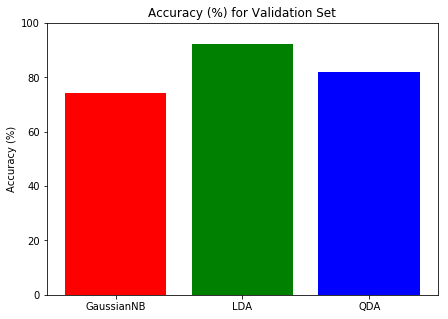

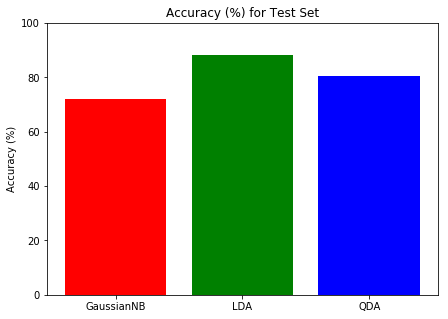

In [50]:
import matplotlib.pyplot as plt


Classifiers = ['GaussianNB', 'LDA', 'QDA']
Acc_val = [acc_val_nb, acc_val_lda, acc_val_qda]
Acc_test = [acc_test_nb, acc_test_lda, acc_test_qda]


fig, ax = plt.subplots(figsize = (7,5))
vnb, vlda, vqda = plt.bar(Classifiers, Acc_val)
vnb.set_facecolor('r')
vlda.set_facecolor('g')
vqda.set_facecolor('b')
ax.set_ylim([0, 100])
ax.set_ylabel('Accuracy (%)')
plt.title('Accuracy (%) for Validation Set')

fig, ax = plt.subplots(figsize = (7,5))
vnb, vlda, vqda = plt.bar(Classifiers, Acc_test)
vnb.set_facecolor('r')
vlda.set_facecolor('g')
vqda.set_facecolor('b')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim([0, 100])
plt.title('Accuracy (%) for Test Set')